# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     803.0
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.02e-39
Time:                        08:55:09   Log-Likelihood:                -1.3178
No. Observations:                  50   AIC:                             10.64
Df Residuals:                      46   BIC:                             18.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0929      0.088     57.690      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.55753212  5.06347659  5.52666717  5.91733763  6.21646423  6.41889124
  6.53417801  6.58502845  6.60356077  6.6260306   6.68687425  6.81305097
  7.01961359  7.3072354   7.66209948  8.05816888  8.46146431  8.83564692
  9.14798861  9.37474923  9.50507696  9.54279126  9.50575534  9.42294129
  9.32967004  9.26180823  9.24987544  9.31402988  9.46075648  9.68180143
  9.95552822 10.25047252 10.53051164 10.7607994  10.91349124 10.97231902
 10.93526383 10.81488769 10.63626963 10.4328853  10.24110699 10.0942278
 10.01699164 10.0215279  10.10535861 10.25180559 10.4327306  10.61315837
 10.75702298 10.83309333]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.8038185  10.63053614 10.33466531  9.96501727  9.58584487  9.26111112
  9.03882889  8.93930564  8.95017146  9.02940765]


## Plot comparison

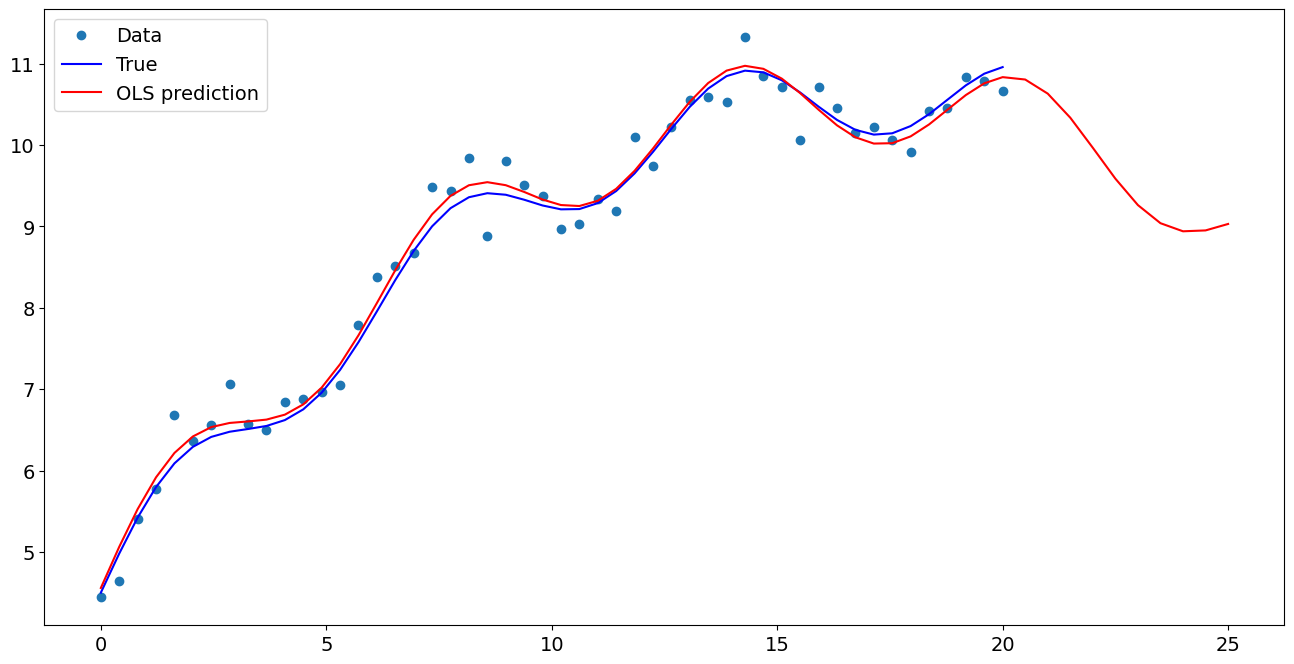

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.092932
x1                  0.503007
np.sin(x1)          0.546178
I((x1 - 5) ** 2)   -0.021416
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.803818
1    10.630536
2    10.334665
3     9.965017
4     9.585845
5     9.261111
6     9.038829
7     8.939306
8     8.950171
9     9.029408
dtype: float64